In [1]:
import sys
sys.path.append('../../')
import ipywidgets as widgets
from IPython.display import display
import stackview
import datetime
from matplotlib import pyplot as plt
import numpy as np

import ailoc.lunar
import ailoc.deeploc
import ailoc.common
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)
ailoc.common.setup_seed(42)

%matplotlib inline

## 1. Set the paths of DeepLoc model, images, predictions and analyzer parameters. 

In [2]:
analyzer_param_widget = ailoc.common.SetAnalyzerParamWidget()
analyzer_param_widget.display_notebook_gui()

SelectFilesButton(description='Select trained model', icon='square-o', layout=Layout(height='80px', width='100…

Checkbox(value=True, description='Select all tiff files under the folder', indent=False)

SelectFilesButton(description='Select tiff file', icon='square-o', layout=Layout(height='80px', width='100%'),…

SaveFilesButton(description='Save predicted CSV', icon='square-o', layout=Layout(height='80px', width='100%'),…

GridspecLayout(children=(BoundedIntText(value=1, description='Block(GB)', layout=Layout(grid_area='widget001')…

Button(description='OK', style=ButtonStyle())

Output()

## 2. Run the code cell to initialize the DeepLoc analyzer

In [3]:
data_analyzer = ailoc.common.SmlmDataAnalyzer(loc_model=analyzer_param_widget.analyzer_param['loc_model'],
                                                 tiff_path=analyzer_param_widget.analyzer_param['tiff_path'],
                                                 output_path=analyzer_param_widget.analyzer_param['output_path'],
                                                 time_block_gb=analyzer_param_widget.analyzer_param['time_block_gb'],
                                                 batch_size=analyzer_param_widget.analyzer_param['batch_size'],
                                                 sub_fov_size=analyzer_param_widget.analyzer_param['sub_fov_size'],
                                                 over_cut=analyzer_param_widget.analyzer_param['over_cut'],
                                                 num_workers=analyzer_param_widget.analyzer_param['num_workers'])

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
the file to save the predictions is: D:/Li_Lab_users/fushuang/AI4Loc-master/results/2024-12-30-07LUNAR_SL_demo2-exp_npc_dmo1_predictions.csv
frame ranges || filename: 
[0-26675] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default.ome.tif
[26676-53351] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default_1.ome.tif
[53352-79300] || D:\Li_Lab_users\fushuang\AI4Loc-master\datasets\demo2-exp_npc_dmo1.2\npc_DMO1.2__6_MMStack_Default_2.ome.tif


## 3. Check the predictions about a specific frame

In [4]:
frame_num_widget = widgets.HBox([widgets.Label(value='Input the frame number:'), widgets.BoundedIntText(value=0, min=0, max=data_analyzer.tiff_dataset.sum_file_length-1, step=1,)])
out = widgets.interactive_output(data_analyzer.check_single_frame_output, {'frame_num': frame_num_widget.children[1]})

display(widgets.VBox([frame_num_widget, out]))

## 4. Run the code cell to analyze the data  

Analyzing block: 1/11, contain frames: 7589, already analyzed: 0/79301, ETA: inf min
Processing sub-FOV: 4/4, (248, 267, 248, 263), keep molecules in: (256, 267, 256, 263), loc model: <class 'ailoc.lunar.lunar.Lunar_SyncLearning'>
Analyzing block: 2/11, contain frames: 7589, already analyzed: 7589/79301, ETA: 11.03 min
Processing sub-FOV: 4/4, (248, 267, 248, 263), keep molecules in: (256, 267, 256, 263), loc model: <class 'ailoc.lunar.lunar.Lunar_SyncLearning'>
Analyzing block: 3/11, contain frames: 7589, already analyzed: 15178/79301, ETA: 9.82 min
Processing sub-FOV: 4/4, (248, 267, 248, 263), keep molecules in: (256, 267, 256, 263), loc model: <class 'ailoc.lunar.lunar.Lunar_SyncLearning'>
Analyzing block: 4/11, contain frames: 7589, already analyzed: 22767/79301, ETA: 8.71 min
Processing sub-FOV: 4/4, (248, 267, 248, 263), keep molecules in: (256, 267, 256, 263), loc model: <class 'ailoc.lunar.lunar.Lunar_SyncLearning'>
Analyzing block: 5/11, contain frames: 7589, already analyzed

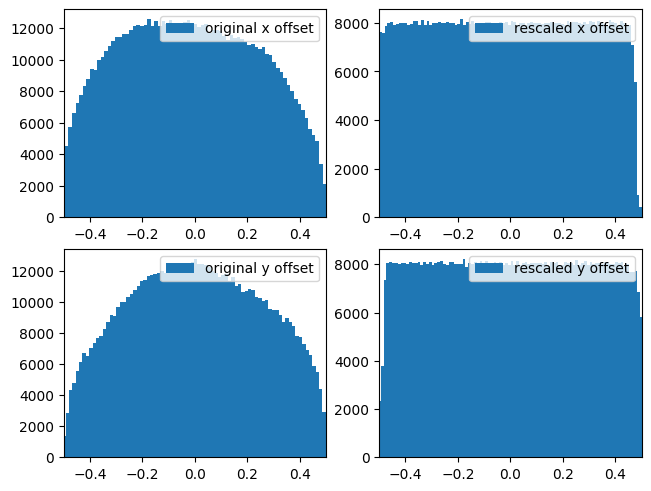

histogram equalization finished, time cost (min): 0.15
the file to save the rescaled predictions is: D:/Li_Lab_users/fushuang/AI4Loc-master/results/2024-12-30-07LUNAR_SL_demo2-exp_npc_dmo1_predictions_rescale.csv


In [5]:
preds_array, preds_rescale_array = data_analyzer.divide_and_conquer()

## 5. Render the results as a super-resolution image (recommend using SMAP)

In [ ]:
plt.figure()
hist_img = ailoc.common.create_3d_hist(preds_rescale_array, 
                                       z_clip=[analyzer_param_widget.analyzer_param['loc_model'].dict_sampler_params['z_range'][0], 
                                               analyzer_param_widget.analyzer_param['loc_model'].dict_sampler_params['z_range'][1]], 
                                       pix_size=100, 
                                       sigma=5, 
                                       contrast_fac=1, 
                                       clip_density=99)
plt.imshow(hist_img)